<a href="https://colab.research.google.com/github/lucidviews/gh-pages/blob/main/clare_yt_ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df = pd.read_excel('/content/drive/MyDrive/History Tubular Topics Check.xlsx', header=1)

In [63]:
df.head()

,Video_Title,Platform,YouTube_AdWords_Placement,YouTube_Video_ID,Video_URL,Category,Views,V1,V2,V3,...,Instagram handle,Topics,Published_Date,Creator,Creator_FollowerCount_or_YouTube_Subscribers,Creator_Country,Creator_Genre,YouTube_Channel_ID,Duration (seconds),Live
0,You Need To Hear This! Our History Is NOT What...,youtube,www.youtube.com/watch?v=P0CnZlX0gXU,P0CnZlX0gXU,https://www.youtube.com/watch?v=P0CnZlX0gXU,Entertainment,3911236,15639.0,24328.0,29362.0,...,NaN,"Film,Society",2021-01-06 15:02:00,The 5th Kind,688000.0,GB,Science & Tech,BSURWtaqrVyYNxaw8E90sQ,7006,False
1,Afghanistan Crisis | History of Taliban | US T...,youtube,www.youtube.com/watch?v=051CBvanVwU,051CBvanVwU,https://www.youtube.com/watch?v=051CBvanVwU,Education,3733641,855842.0,1142063.0,1330111.0,...,dhruvrathee,Knowledge,2021-07-19 16:27:00,Dhruv Rathee,6080000.0,IN,News & Politics,-CSyyi47VX1lD9zyeABW3w,1204,False
2,The San Andreas Fault: Disaster About to Strik...,youtube,www.youtube.com/watch?v=kc4j59C_60E,kc4j59C_60E,https://www.youtube.com/watch?v=kc4j59C_60E,Entertainment,3598948,223053.0,377924.0,448655.0,...,history,NaN,2020-11-22 02:59:00,HISTORY,9010000.0,US,Entertainment,9MAhZQQd9egwWCxrwSIsJQ,2709,False
3,Why Were The Nazis So Stylish? // Secret Histo...,youtube,www.youtube.com/watch?v=60FM9WjkXtA,60FM9WjkXtA,https://www.youtube.com/watch?v=60FM9WjkXtA,Howto & Style,3569366,25800.0,48932.0,83055.0,...,rmrstyle,Society,2021-07-17 12:00:00,Real Men Real Style,2850000.0,US,Fashion & Style,mRfQHc3U4fV1-i8Ry1HmtA,1098,False
4,Yellowstone: Big Volcano Ready to Erupt | How ...,youtube,www.youtube.com/watch?v=THrCVC_XXZA,THrCVC_XXZA,https://www.youtube.com/watch?v=THrCVC_XXZA,Entertainment,2206342,128124.0,167167.0,193924.0,...,history,NaN,2021-02-21 02:59:00,HISTORY,9010000.0,US,Entertainment,9MAhZQQd9egwWCxrwSIsJQ,2692,False


In [64]:
df['engagement_per_follower'] = df['Total_Engagements']/df['Creator_FollowerCount_or_YouTube_Subscribers']
df['views_per_follower'] = df['Views']/df['Creator_FollowerCount_or_YouTube_Subscribers']

# Distribution of followers per account

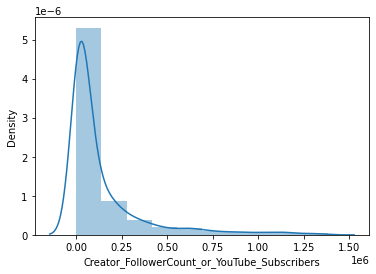

In [65]:
df_5 = df[df['Creator_FollowerCount_or_YouTube_Subscribers'] < df['Creator_FollowerCount_or_YouTube_Subscribers'].quantile(0.9)]
#df_5.groupby('Creator').max()['Creator_FollowerCount_or_YouTube_Subscribers'].hist(density=1)
#plt.hist(df_5.groupby('Creator').max()['Creator_FollowerCount_or_YouTube_Subscribers'], 10, density=True)
sns.distplot(df_5.groupby('Creator').max()['Creator_FollowerCount_or_YouTube_Subscribers'], 10, norm_hist=True, )

In [66]:
0.125*(10**6)

125000.0

Insight: Majority of Creators have up to 125,000 followers. Only a small fraction has more.

# Videos per catgeory

In [67]:
df.groupby('Category').count()[['views_per_follower', 'engagement_per_follower']].sort_values(by=['views_per_follower'], ascending=False)

,views_per_follower,engagement_per_follower
Category,,
Education,1243,1243
Entertainment,804,804
People & Blogs,605,605
News & Politics,426,426
Science & Technology,271,271
Gaming,208,208
Howto & Style,150,150
Pets & Animals,139,139
Sports,132,132


# Average views_per_follower, engagement_per_follower, views, and total_engagements per category

In [68]:
df.groupby('Category').mean()[['views_per_follower', 'engagement_per_follower', 'Views', "Total_Engagements"]].round(2).sort_values(by=['views_per_follower'], ascending=False)

,views_per_follower,engagement_per_follower,Views,Total_Engagements
Category,,,,
Science & Technology,476.44,6.50,35210.16,1292.42
Film & Animation,181.67,8.45,22529.81,837.11
Howto & Style,56.76,0.66,45248.72,1896.24
News & Politics,19.40,0.46,30520.18,1336.97
Education,14.59,0.72,59486.43,2554.35
Autos & Vehicles,8.84,0.36,32684.26,1120.04
People & Blogs,8.48,0.20,16978.71,812.99
Entertainment,6.21,0.11,48682.68,1438.44
Music,4.61,0.09,69882.86,2107.69


Insight: Some channels like music seem to be generally popular as they generate many views and engagement on avergae but their follower ratios are way worse than other channels which indicates that they do not get viral outside of their followers.

# Correlation matrix between all numeric features

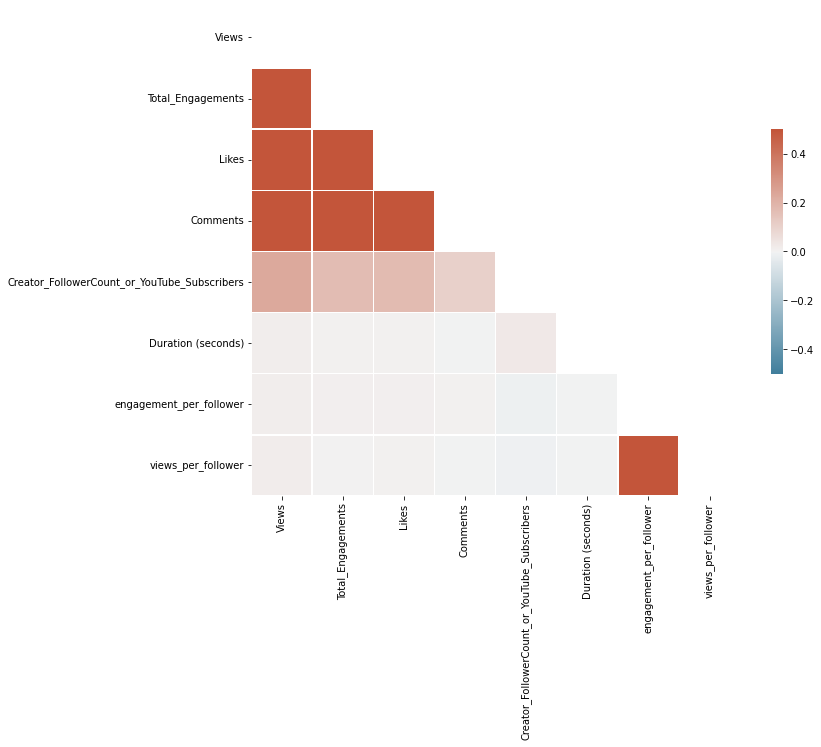

In [71]:
# Compute the correlation matrix
df_corr = df.drop(columns=['V1', 'V2', 'V3', 'V7', 'V30', 'Twitter Favorites', 'Tweets', 'Facebook_Total_Engagements', 'Facebook_Shares', 'Facebook_Likes',
       'Facebook_Comments', 'Facebook_Loves', 'Facebook_Hahas',
       'Facebook_Wows', 'Facebook_Sads', 'Facebook_Angrys',
       'Facebook_Page_URL', 'Instagram handle', 'Topics', 'Published_Date',
       'Creator', 'Live'])
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, vmin=-0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Insight: Interesting is that the number of views is only very slighlty poisitve correlated with duration which means the length of the video has no general infleunce on the performance. Also the number of followers does not guarantee many views + engagement as the correltion is medium strong. 